# Importing Main Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import shutil

# EDA

### Displaying Sample Images

In [ ]:
from sklearn.model_selection import train_test_split

# Define input paths
normal_dir = '/content/drive/MyDrive/Stupen/Deep Learning/NORMAL'
covid_dir = '/content/drive/MyDrive/Stupen/Deep Learning/COVID'

# Define output paths
output_dir = '/content/drive/MyDrive/Stupen/Deep Learning'
normal_train_dir = os.path.join(output_dir, 'normal_train')
normal_test_dir = os.path.join(output_dir, 'normal_test')
covid_train_dir = os.path.join(output_dir, 'covid_train')
covid_test_dir = os.path.join(output_dir, 'covid_test')

# Create directories if they do not exist
os.makedirs(normal_train_dir, exist_ok=True)
os.makedirs(normal_test_dir, exist_ok=True)
os.makedirs(covid_train_dir, exist_ok=True)
os.makedirs(covid_test_dir, exist_ok=True)

# Function to split and copy files
def split_and_copy_files(source_dir, train_dir, test_dir, test_size=0.2):
    files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]
    train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)

    for file in train_files:
        shutil.copy2(os.path.join(source_dir, file), train_dir)

    for file in test_files:
        shutil.copy2(os.path.join(source_dir, file), test_dir)

# Split and copy normal images
split_and_copy_files(normal_dir, normal_train_dir, normal_test_dir)

# Split and copy covid images
split_and_copy_files(covid_dir, covid_train_dir, covid_test_dir)

# Define destination directories
destination_dir_test = os.path.join(output_dir, 'test')
destination_dir_train = os.path.join(output_dir, 'train')

# Create destination directories if they do not exist
os.makedirs(destination_dir_test, exist_ok=True)
os.makedirs(destination_dir_train, exist_ok=True)

# Function to move directories
def move_directory(src, dst):
    if os.path.exists(dst):
        shutil.rmtree(dst)  # Remove existing directory if any
    os.rename(src, dst)

# Move the folders
try:
    # Move test folders
    move_directory(covid_test_dir, os.path.join(destination_dir_test, 'covid'))
    move_directory(normal_test_dir, os.path.join(destination_dir_test, 'normal'))

    # Move train folders
    move_directory(covid_train_dir, os.path.join(destination_dir_train, 'covid'))
    move_directory(normal_train_dir, os.path.join(destination_dir_train, 'normal'))

    print("Folders moved successfully!")
except OSError as error:
    print(f"Error moving folders: {error}")

Folders moved successfully!


image dimensions: (232, 232)


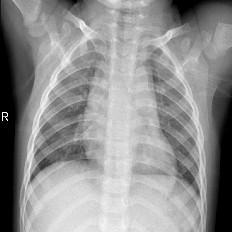

In [ ]:
# Pillow for image processing
from PIL import Image

normal_image_path = '/content/drive/MyDrive/Stupen/Deep Learning/train/normal/NORMAL_1000.png'
normal_image = Image.open(normal_image_path)
print("image dimensions:",normal_image.size)
normal_image

image dimensions: (232, 232)


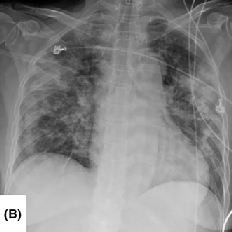

In [ ]:
# Getting sample tomatoes image
covid_image_path = '/content/drive/MyDrive/Stupen/Deep Learning/train/covid/COVID_1003.png'
covid_image = Image.open(covid_image_path)
print("image dimensions:", covid_image.size)
covid_image

### Getting dimensions of all images to check if there are any anomalies in the images data as well as to know the range of shapes and colors

In [ ]:
# Getting train and test directories
train_dir = '/content/drive/MyDrive/Stupen/Deep Learning/train'
test_dir = '/content/drive/MyDrive/Stupen/Deep Learning/test'

In [ ]:
from itertools import chain
from matplotlib import pyplot as plt

# Creating set of dimensions
unique_dimensions = set()
unique_modes = set()

# Iterating through all images
for subdir in chain(os.listdir(train_dir), os.listdir(test_dir)):
    subdir_path = os.path.join(train_dir, subdir)
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        image = Image.open(file_path)
        # Adding shape and mode of give image to sets
        unique_dimensions.add(image.size[0])
        unique_dimensions.add(image.size[1])
        unique_modes.add(image.mode)

print("unique modes:", unique_modes)
print("unique dimensions:", unique_dimensions)

unique modes: {'RGB'}
unique dimensions: {232, 256}


#### All images are at different sizes they will have to be resized into same dimension later

In [ ]:
# Setting the dimensions for images to be resized to
DIMENSIONS = [150, 150]

# Creating CNN model

In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout
from keras import backend
import tensorflow as tf
import keras

# Creating simple model
def simple_model():
    # Clearning any model memory
    backend.clear_session()

    # Creating Sequential model
    model = Sequential()

    # Adding convolution layers
    model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform', activation="relu", input_shape=(*DIMENSIONS, 3)))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform', activation="relu"))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform', activation="relu"))
    model.add(MaxPooling2D(2, 2))

    # Flattening the output and adding Dense layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu", kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    return model

In [ ]:
# Creating advanced model
def advanced_model():
    # Clearning any model memory
    backend.clear_session()

    # Creating Sequential model
    model = Sequential()

    # Adding convolution layers
    model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform', input_shape=(*DIMENSIONS, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(2, 2))

    # Flattening the output and adding Dense layers
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    return model

### Creating Image Generator Pipeline

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Applying data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.25,
      height_shift_range=0.25,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      brightness_range=(0.8, 1.2),
      fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Flow from directory images using train_datagen and valid_datagen generators

train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=tuple(DIMENSIONS),  # All images will be resized to 232x232
        class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels

valid_generator = valid_datagen.flow_from_directory(
        test_dir,  # This is the source directory for training images
        target_size=tuple(DIMENSIONS),  # All images will be resized to 100x100
        class_mode='binary')

Found 2741 images belonging to 2 classes.
Found 687 images belonging to 2 classes.


### Compiling And Training The Model

In [ ]:
# Creating new model
model = simple_model()
# model = advanced_model()

# Parameters
BATCH_SIZE = 64
EPOCHS = 25

model.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# Training the model
history = model.fit(
      train_generator,
      validation_data=valid_generator,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch, lr: lr if epoch < 60 else lr * tf.math.exp(-0.05))],
      verbose=1)

Epoch 1/25
86/86 [==============================] - 216s 2s/step - loss: 0.9435 - accuracy: 0.7501 - val_loss: 0.2221 - val_accuracy: 0.9330 - lr: 0.0010
Epoch 2/25
86/86 [==============================] - 207s 2s/step - loss: 0.3712 - accuracy: 0.8592 - val_loss: 0.1619 - val_accuracy: 0.9447 - lr: 0.0010
Epoch 3/25
86/86 [==============================] - 214s 2s/step - loss: 0.3114 - accuracy: 0.8781 - val_loss: 0.1719 - val_accuracy: 0.9403 - lr: 0.0010
Epoch 4/25
86/86 [==============================] - 208s 2s/step - loss: 0.2569 - accuracy: 0.8993 - val_loss: 0.1412 - val_accuracy: 0.9389 - lr: 0.0010
Epoch 5/25
86/86 [==============================] - 215s 2s/step - loss: 0.2391 - accuracy: 0.9070 - val_loss: 0.1285 - val_accuracy: 0.9636 - lr: 0.0010
Epoch 6/25
86/86 [==============================] - 221s 3s/step - loss: 0.1904 - accuracy: 0.9285 - val_loss: 0.1069 - val_accuracy: 0.9709 - lr: 0.0010
Epoch 7/25
86/86 [==============================] - 211s 2s/step - loss: 0.1

# Testing CNN model

### Plotting Learning Curves

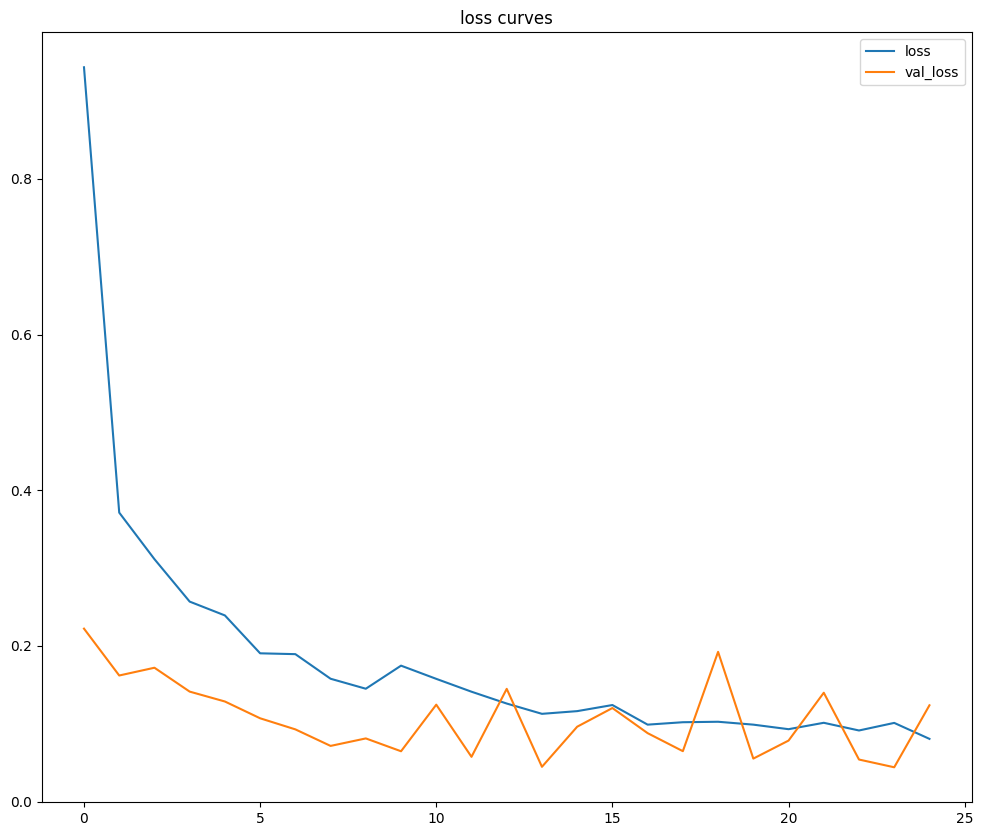

In [ ]:
import matplotlib.pyplot as plt

# Plotting loss curves
plt.figure(figsize=(12,10))
plt.title("loss curves")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

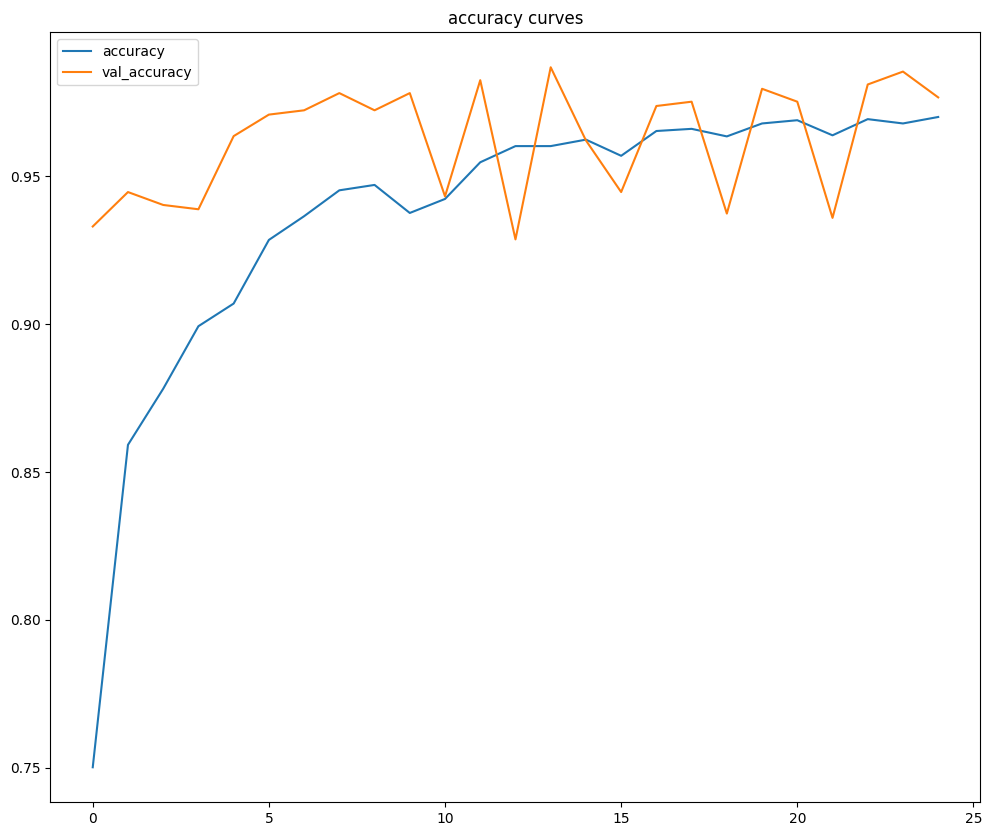

In [ ]:
# Plotting accuracy curves
plt.figure(figsize=(12,10))
plt.title("accuracy curves")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

### Displaying Confusion Matrix

In [ ]:
# Creating new generator for test data
test_generator = valid_datagen.flow_from_directory(
        test_dir,  # This is the source directory for test images
        target_size=(DIMENSIONS),  # All images will be resized to 100x100
        class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
        shuffle=False)  # We don't want to shuffle the test data

# Predicting labels for all test images
y_pred = model.predict(test_generator)
y_pred[:10]

Found 687 images belonging to 2 classes.
22/22 [==============================] - 14s 609ms/step


array([[7.5081969e-04],
       [6.7341782e-05],
       [4.4840903e-04],
       [1.1342858e-04],
       [9.4795059e-03],
       [5.6888518e-04],
       [9.9534141e-03],
       [1.0915843e-05],
       [1.4009634e-04],
       [2.0357504e-04]], dtype=float32)

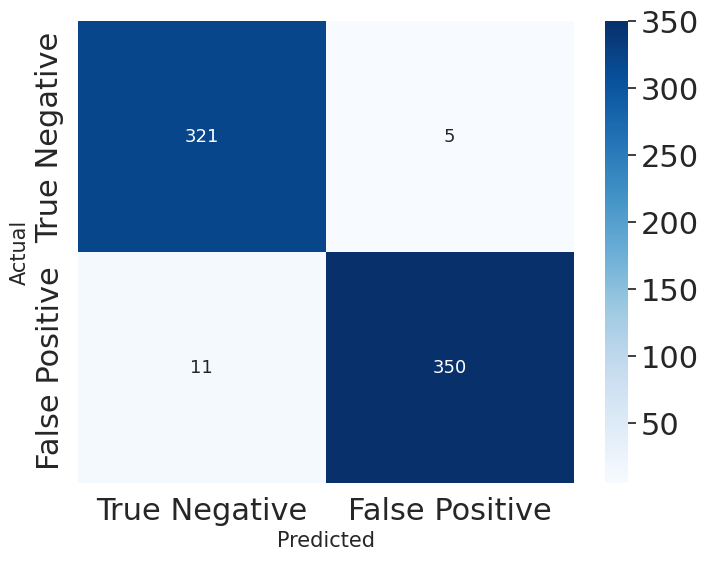

In [ ]:
from sklearn.metrics import confusion_matrix

# Getting the true labels for the test data
y_true = test_generator.labels

# Converting the predicted labels to binary labels
y_pred = np.round(y_pred)

# Calculating the confusion matrix
confusion_matrix = confusion_matrix(y_true, y_pred)

# Displaying the confusion matrix
import seaborn as sns
from seaborn import heatmap

plt.figure(figsize=(8,6))
sns.set(font_scale=2)

heatmap(confusion_matrix,
        annot=True,
        annot_kws={"size": 13},
        fmt='g',
        cmap='Blues',
        xticklabels=['True Negative', 'False Positive'],
        yticklabels=['True Negative', 'False Positive'])

plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

Dari hasil Confusion Matrix di atas dapat diambil kesimpulan bahwa data/gambar yang diprediksi benar (Covid di prediksi Covid) berjumlah 350 data dan 5 data yang salah namun diprediksi benar. Sedangkan, 350 data diprediksi benar (Normal diprediksi Normal) dan 11 data diprediksi benar diprediksi salah.

### Displaying those images that were wrongly classified

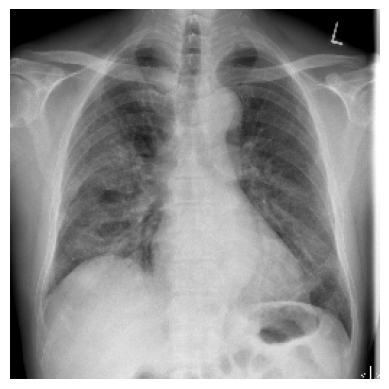

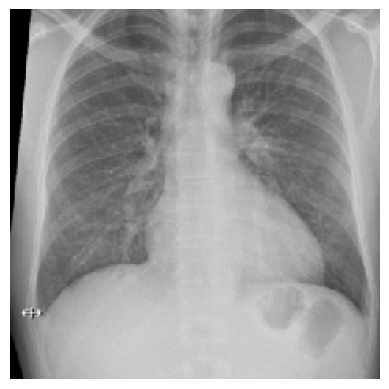

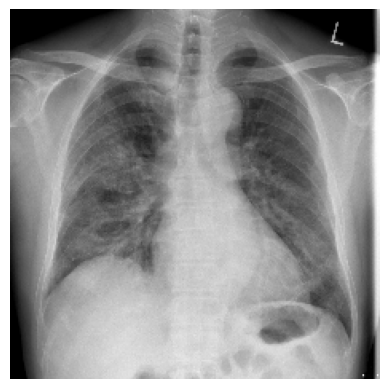

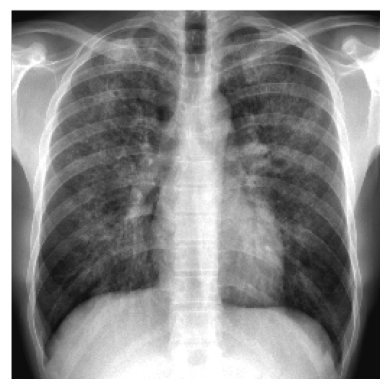

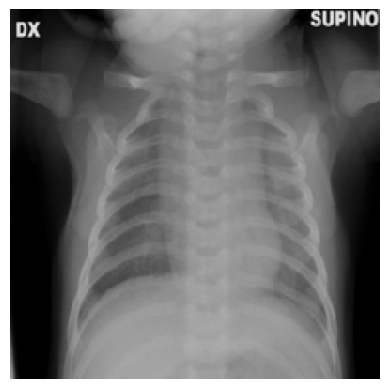

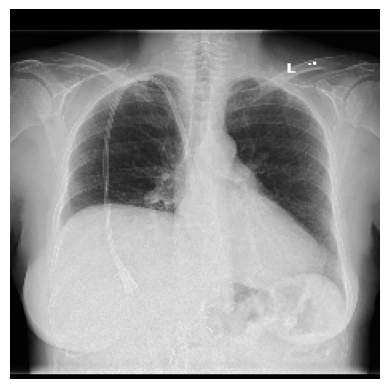

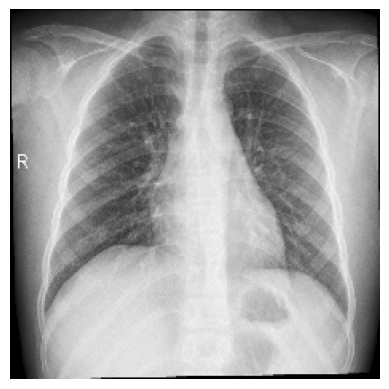

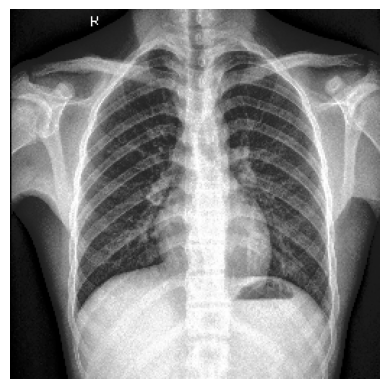

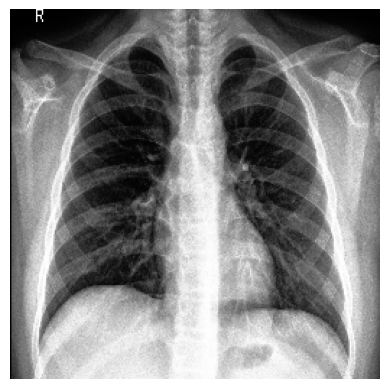

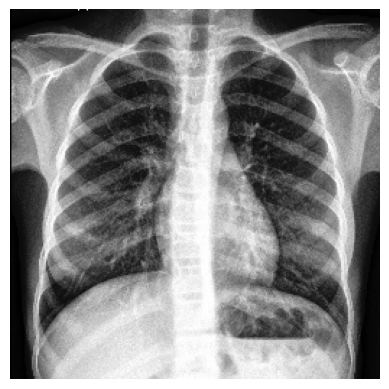

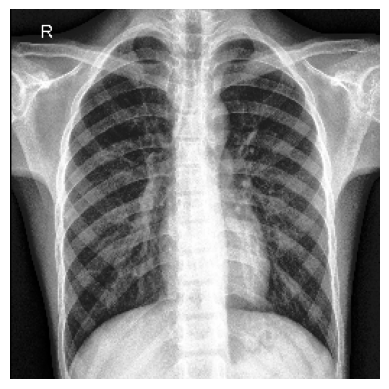

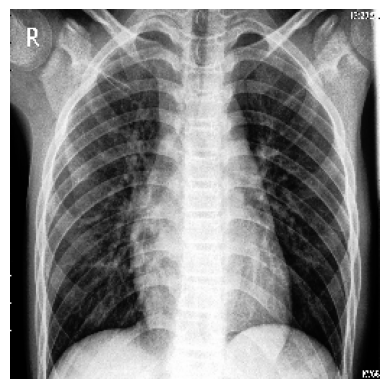

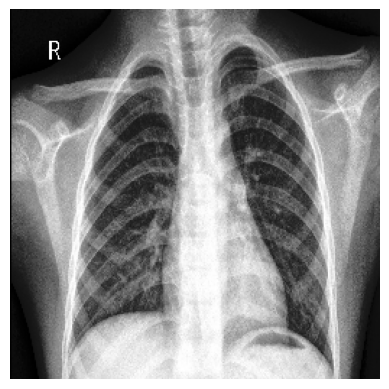

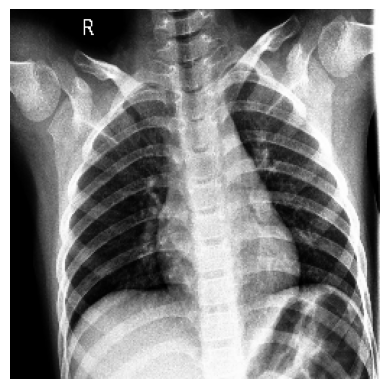

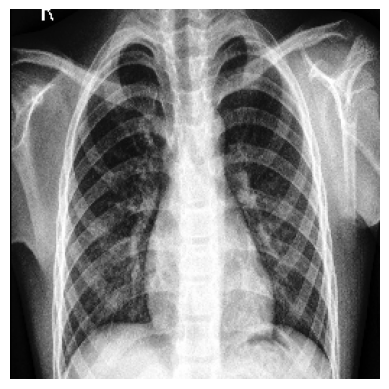

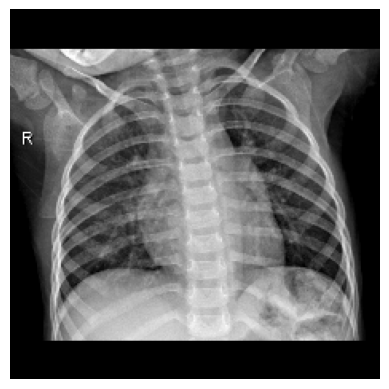

In [ ]:
# Getting indecies of wrongly classified images
misclassified_indices = np.where(y_true.reshape(-1,1) != y_pred)[0]

# Displaying all wrongly classified images
for i in misclassified_indices:
    image_path = test_generator.filepaths[i]
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Mendapatkan prediksi untuk set pengujian
test_generator.reset()  # Mereset generator agar prediksi dilakukan dari awal
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).astype(int).flatten()  # Mengonversi prediksi ke label biner

# Mendapatkan label sebenarnya untuk data pengujian
y_true = test_generator.labels

# Menghitung metrik evaluasi
report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print(report)


22/22 [==============================] - 14s 605ms/step
              precision    recall  f1-score   support

       covid       0.97      0.98      0.98       326
      normal       0.99      0.97      0.98       361

    accuracy                           0.98       687
   macro avg       0.98      0.98      0.98       687
weighted avg       0.98      0.98      0.98       687

